In [1]:
# 라이브러리 설정
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 디렉토리 확인용

print(Path.cwd().parent.parent)

/Users/admin/해커톤01/vote-AI


In [3]:
# 디렉토리 정의 및 데이터 불러오기

BASE_DIR = Path.cwd().parent.parent
DATA_DIR = BASE_DIR / "data:raw"

train_df = pd.read_csv(DATA_DIR/"train.csv")
test_df = pd.read_csv(DATA_DIR/"test_x.csv")

TARGET = 'voted'

In [4]:
# 데이터 일부 확인

train_df.head(10)

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1
5,5,2.0,834,1.0,1769,4.0,2105,1.0,1070,5.0,...,0,0,0,0,1,0,0,0,0,0
6,6,1.0,1382,1.0,1473,5.0,1479,4.0,2403,1.0,...,1,1,1,1,1,0,1,0,1,1
7,7,1.0,384,1.0,908,5.0,870,1.0,1059,1.0,...,1,1,1,1,1,1,1,0,1,1
8,8,5.0,795,2.0,3469,4.0,1693,3.0,1991,4.0,...,0,0,0,0,1,0,0,0,1,1
9,9,2.0,1668,1.0,866,1.0,895,1.0,1308,2.0,...,1,1,0,1,1,0,1,1,1,1


In [5]:
# 데이터 쉐잎 확인

print('Train Shape: ', train_df.shape)
print('Test Shape: ', test_df.shape)

Train Shape:  (45532, 78)
Test Shape:  (11383, 77)


In [6]:
# 데이터 정보 확인

train_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-null  float64


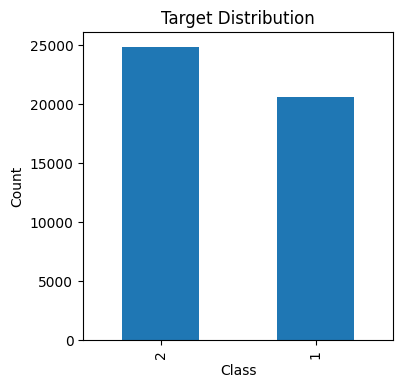

In [7]:
# 타겟 변수 분석

plt.figure(figsize=(4,4))
train_df[TARGET].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [8]:
print(train_df[TARGET].value_counts(normalize=True))

voted
2    0.546824
1    0.453176
Name: proportion, dtype: float64


In [9]:
# feature 유형 분리

num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

num_cols = [c for c in num_cols if c != TARGET]

/var/folders/kf/t62tt0mn3mdc2y72hnq9mv7c0000gn/T/ipykernel_80023/1128919405.py:4: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()


In [10]:
print('Numerical Features: ', len(num_cols))
print('Categorical Features: ', len(cat_cols))

Numerical Features:  73
Categorical Features:  4


In [11]:
# 데이터 통계
train_df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
index,45532.0,22765.500000,13144.100565,0.0,11382.75,22765.5,34148.25,45531.0
QaA,45532.0,2.129535,1.196952,1.0,1.00,2.0,3.00,5.0
QaE,45532.0,945.357046,13075.648143,25.0,404.00,557.0,827.00,2413960.0
QbA,45532.0,2.904463,1.566142,1.0,1.00,3.0,4.00,5.0
QbE,45532.0,2189.588575,33510.265924,25.0,875.00,1218.0,1838.00,5580395.0
...,...,...,...,...,...,...,...,...
wr_09,45532.0,0.202824,0.402107,0.0,0.00,0.0,0.00,1.0
wr_10,45532.0,0.946104,0.225815,0.0,1.00,1.0,1.00,1.0
wr_11,45532.0,0.395195,0.488898,0.0,0.00,0.0,1.00,1.0
wr_12,45532.0,0.947729,0.222575,0.0,1.00,1.0,1.00,1.0


/var/folders/kf/t62tt0mn3mdc2y72hnq9mv7c0000gn/T/ipykernel_80023/3598415504.py:8: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


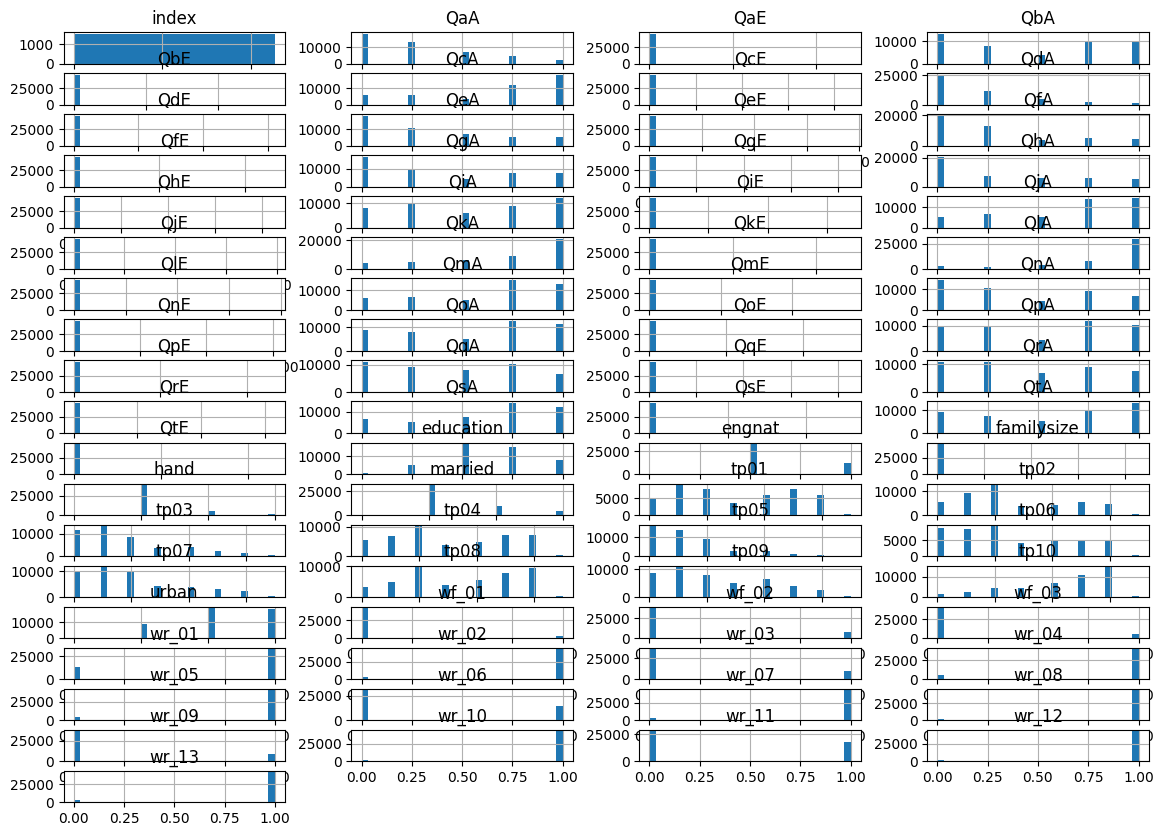

In [12]:
# 데이터 분포 확인

train_df[num_cols].hist(
    bins=30,
    figsize=(14, 10),
    layout=(len(num_cols)//4 + 1, 4)
)
plt.tight_layout()
plt.show()

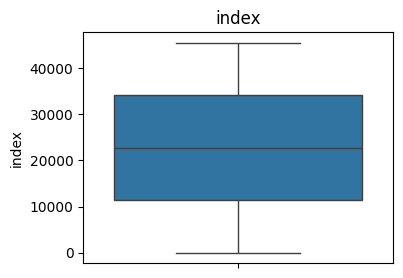

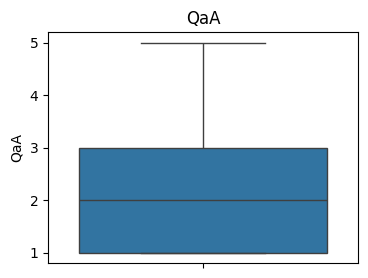

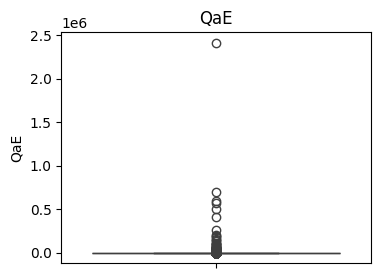

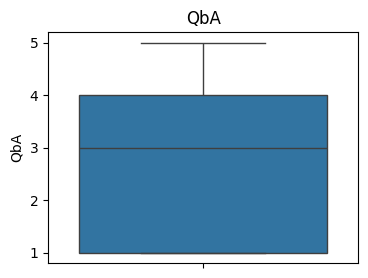

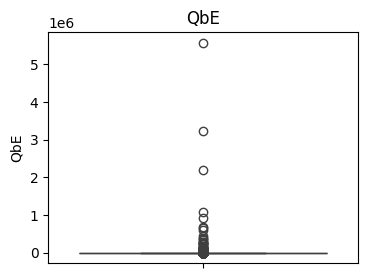

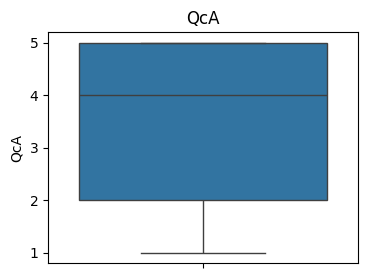

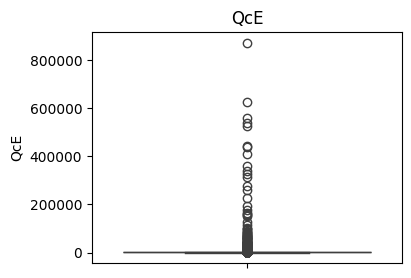

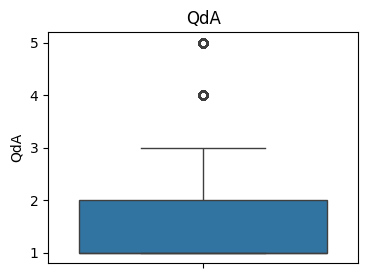

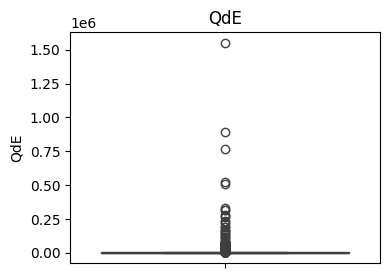

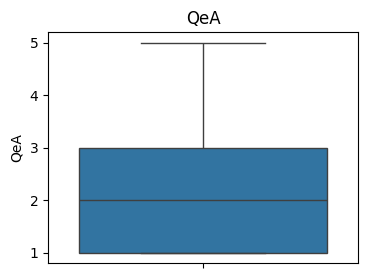

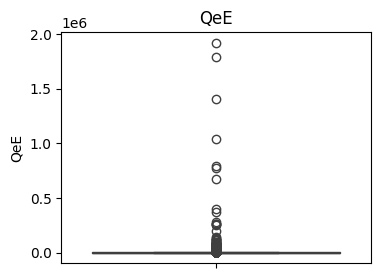

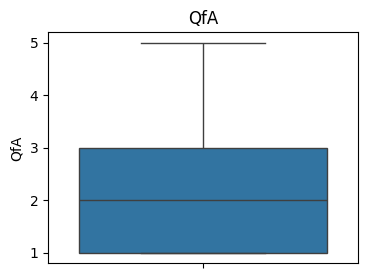

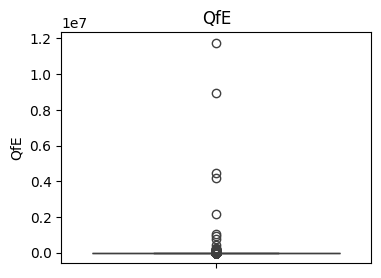

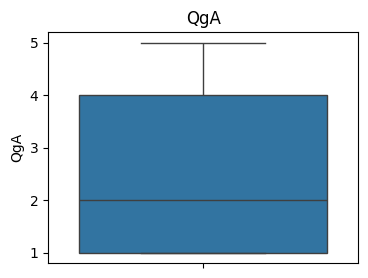

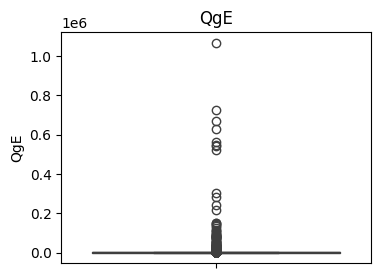

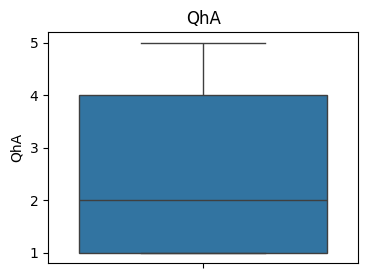

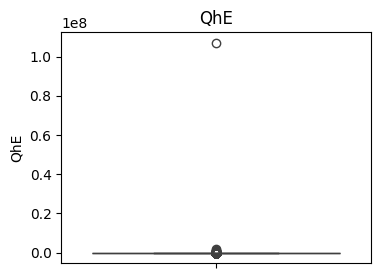

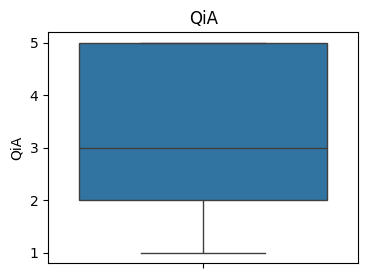

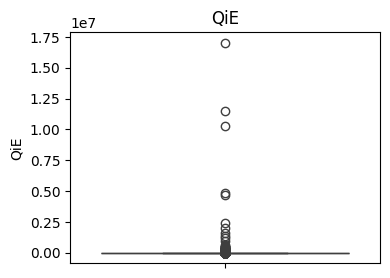

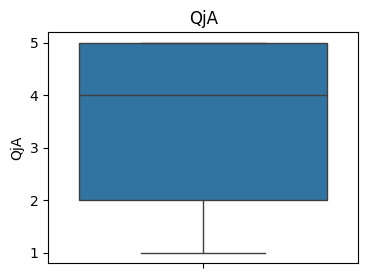

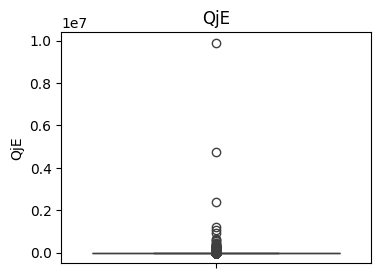

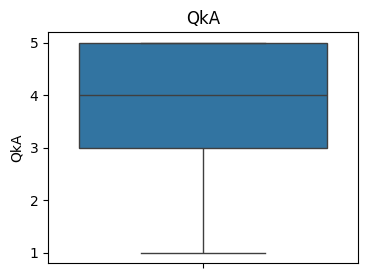

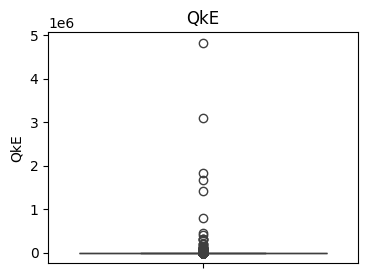

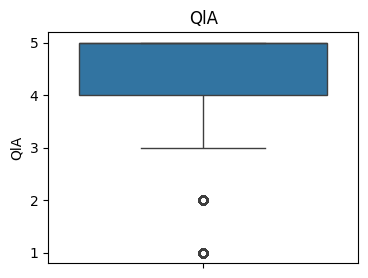

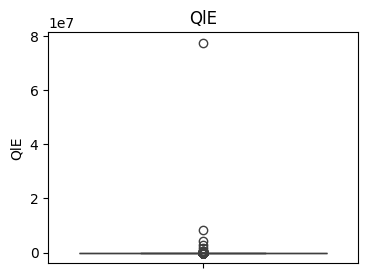

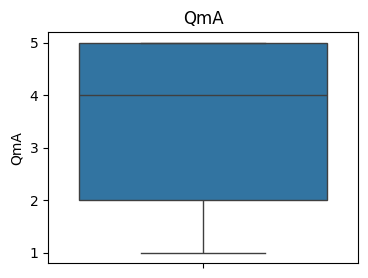

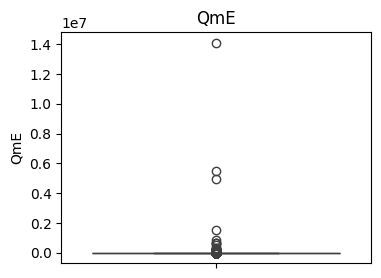

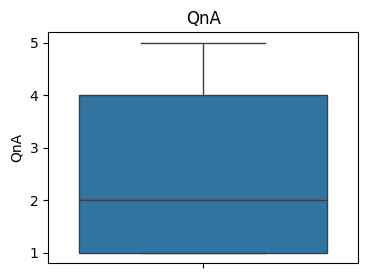

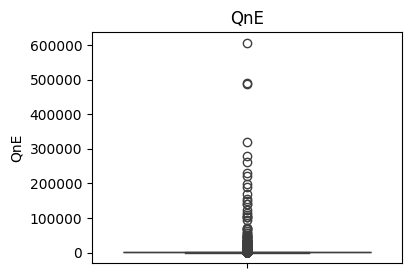

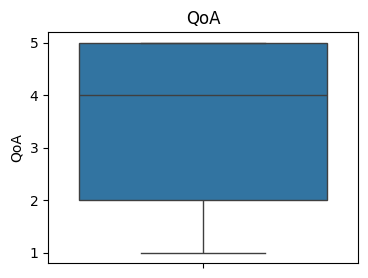

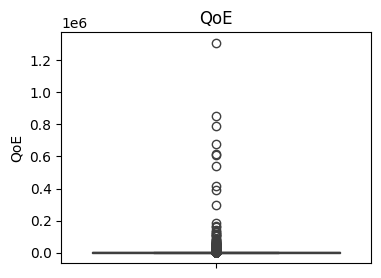

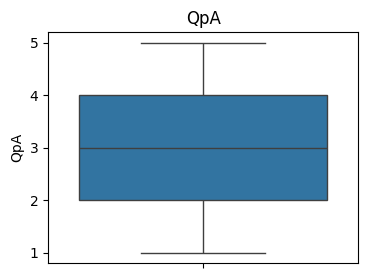

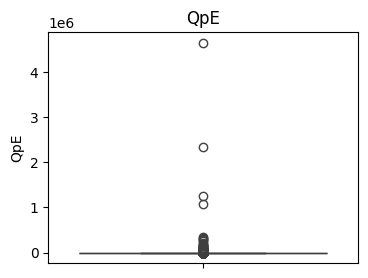

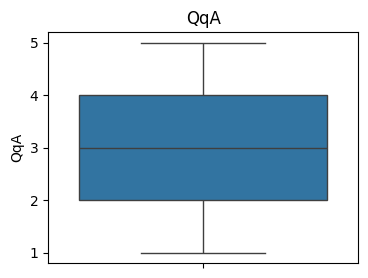

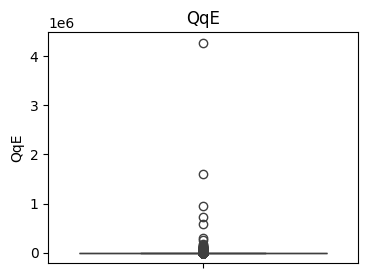

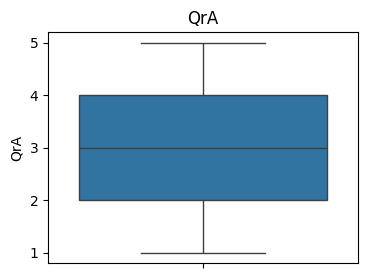

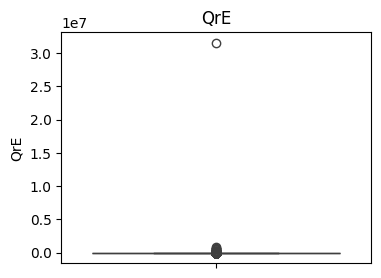

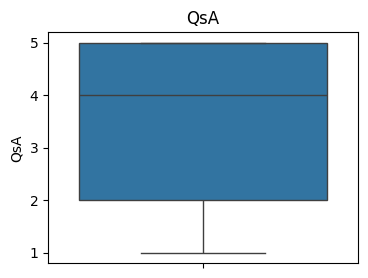

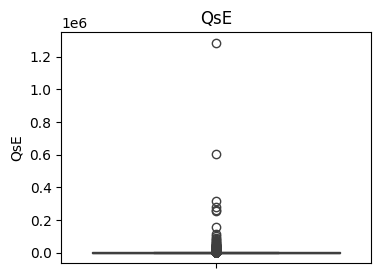

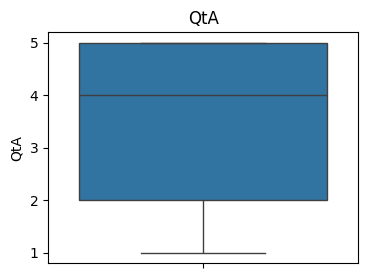

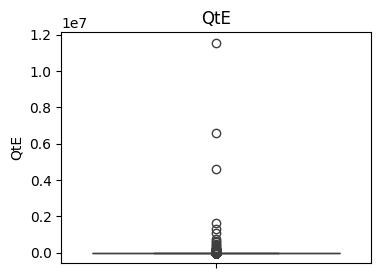

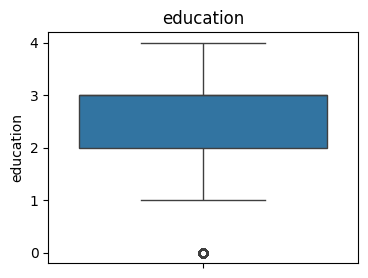

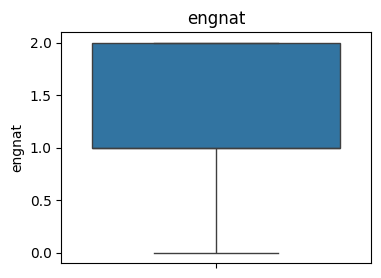

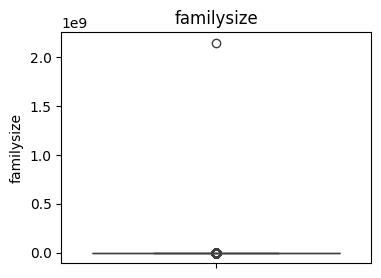

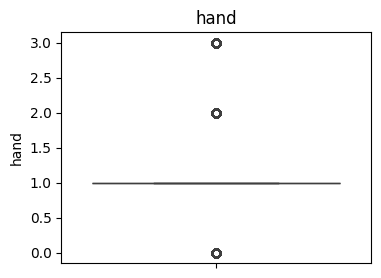

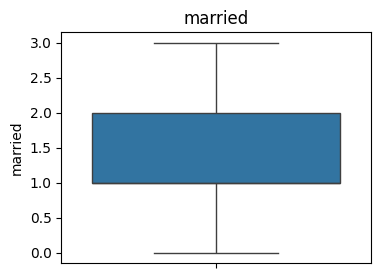

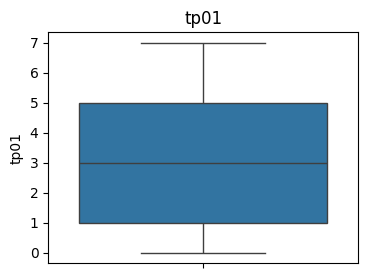

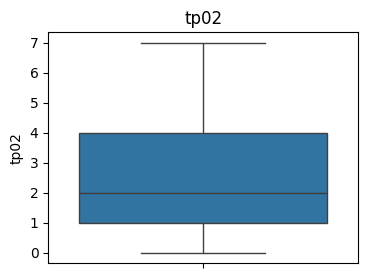

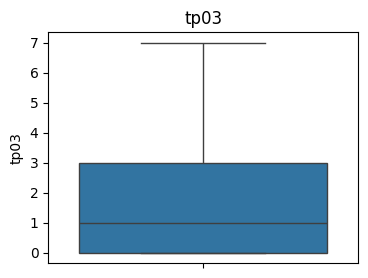

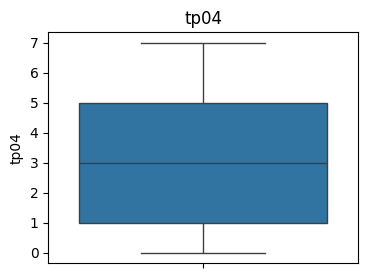

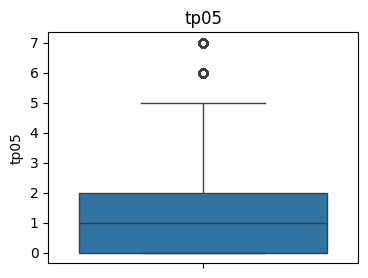

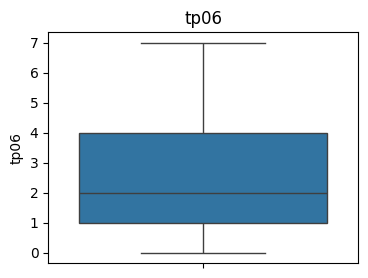

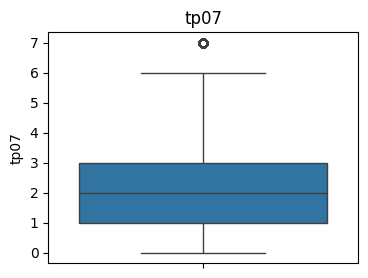

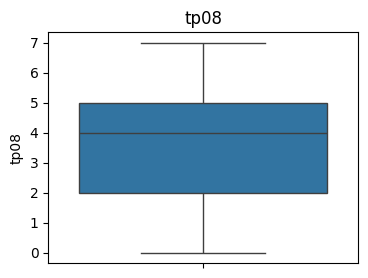

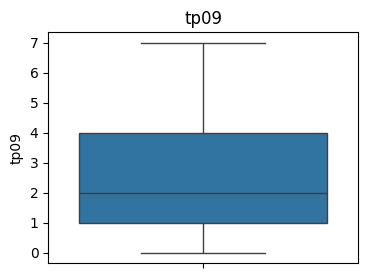

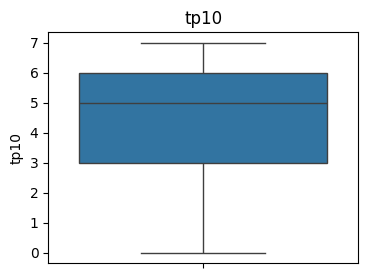

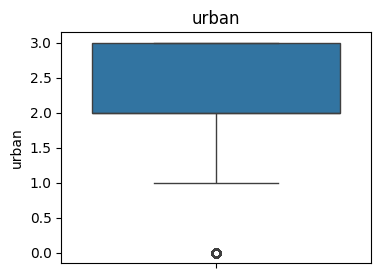

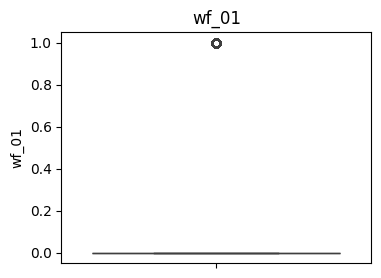

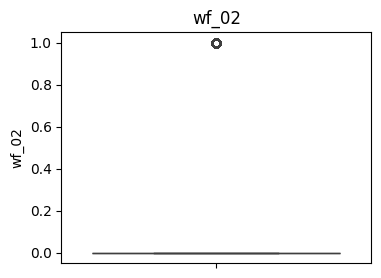

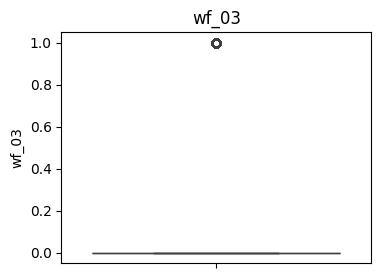

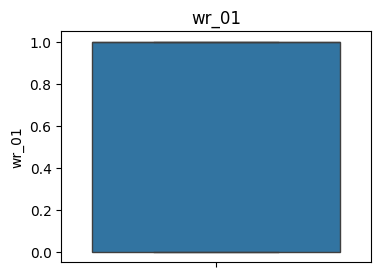

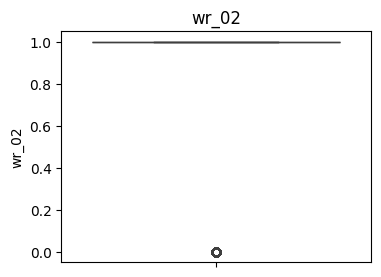

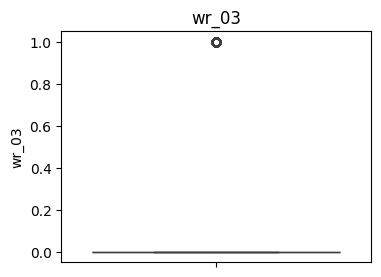

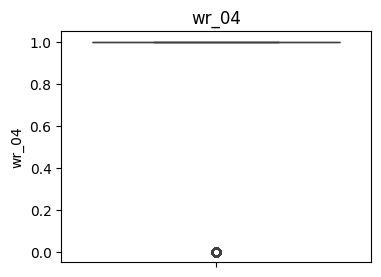

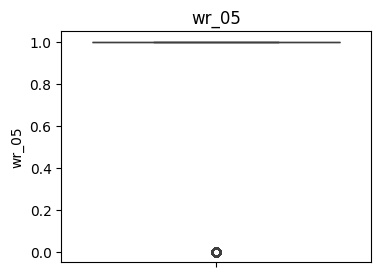

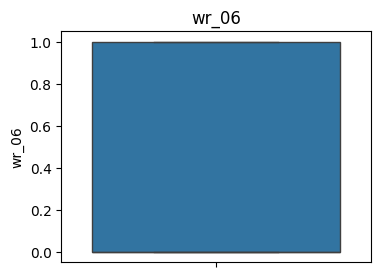

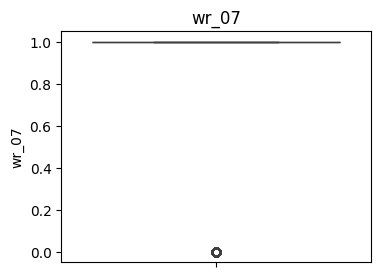

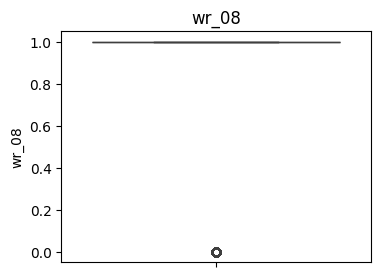

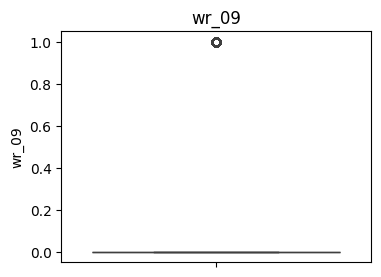

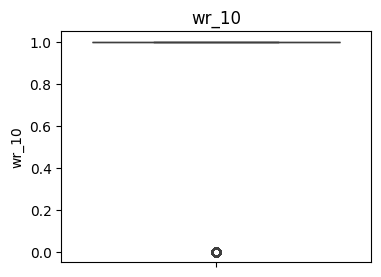

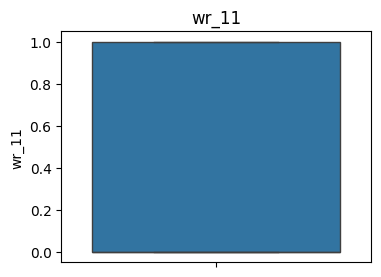

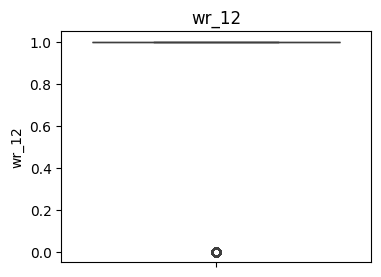

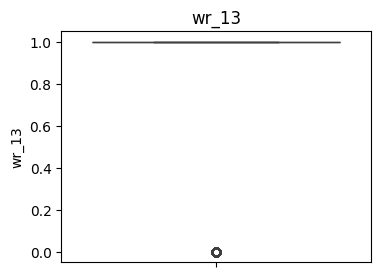

In [22]:
# 이상치 탐색
for col in num_cols[:]:
    plt.figure(figsize=(4,3))
    sns.boxplot(y=train_df[col])
    plt.title(col)
    plt.show()

In [14]:
# 범주형 변수 분석

cat_summary = pd.DataFrame({
    'n_unique': train_df[cat_cols].nunique(),
    'missing_rate': train_df[cat_cols].isnull().mean()
}).sort_values('n_unique', ascending=False)

cat_summary

,n_unique,missing_rate
religion,12,0.0
age_group,7,0.0
race,7,0.0
gender,2,0.0


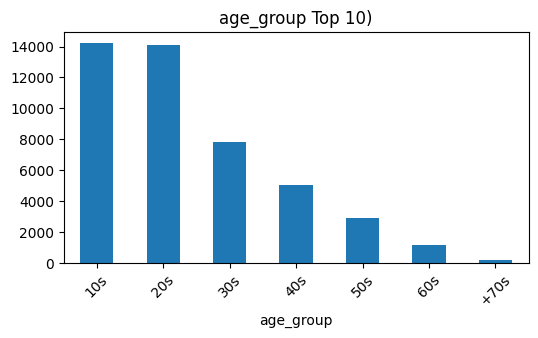

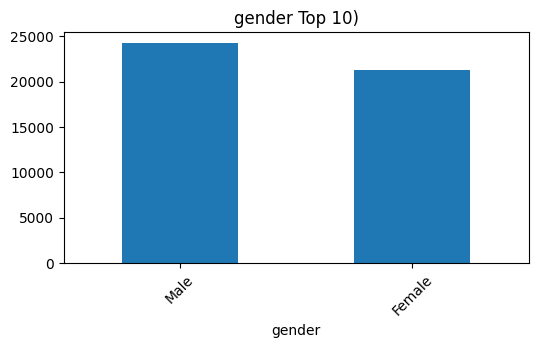

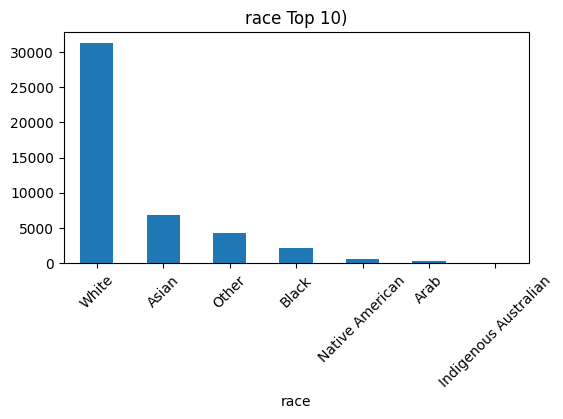

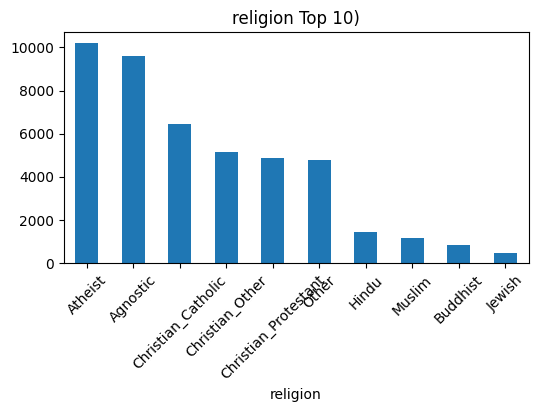

In [15]:
# 상위 빈도 시각화

for col in cat_cols[:5]:
    plt.figure(figsize=(6, 3))
    train_df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'{col} Top 10)')
    plt.xticks(rotation=45)
    plt.show()

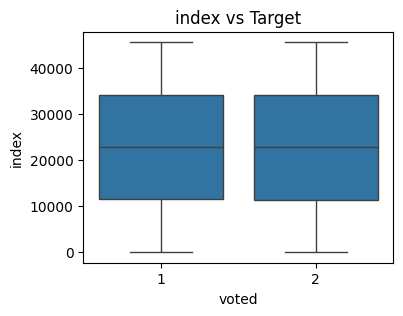

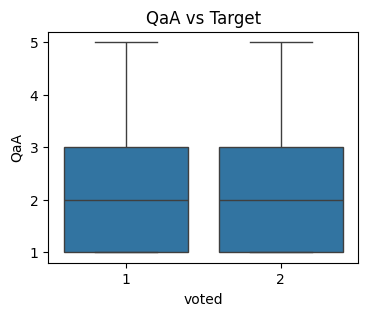

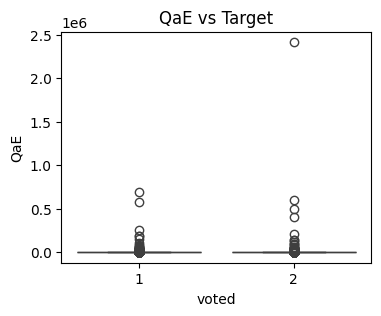

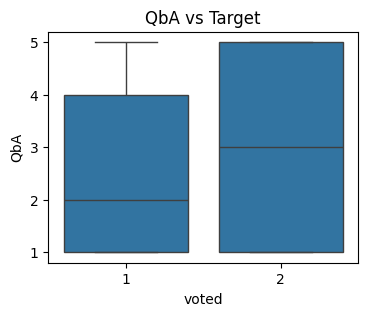

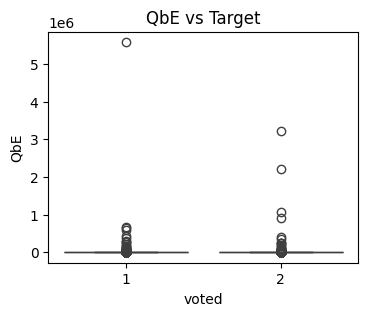

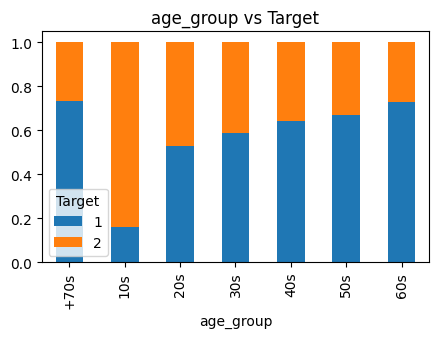

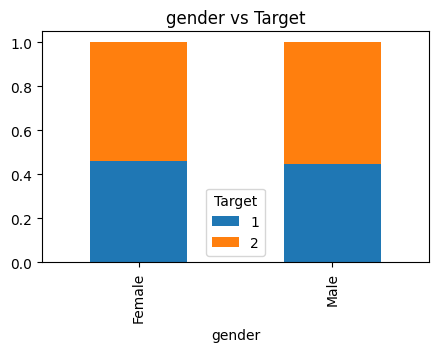

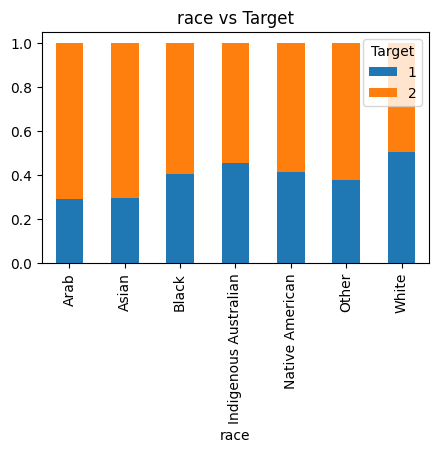

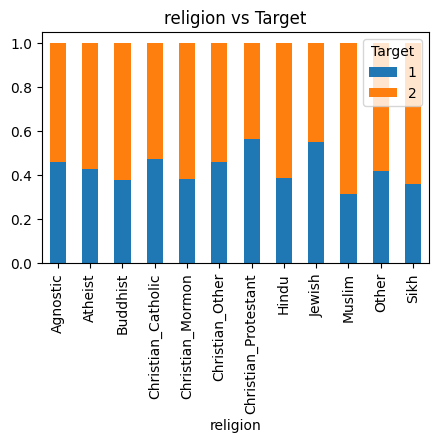

In [16]:
# feature 와 Target 관계성

# 수치형 feature
for col in num_cols[:5]:
    plt.figure(figsize=(4,3))
    sns.boxplot(x=train_df[TARGET], y=train_df[col])
    plt.title(f'{col} vs Target')
    plt.show()

# 범주형 feature
for col in cat_cols[:5]:
    ct = pd.crosstab(train_df[col], train_df[TARGET], normalize='index')
    ct.plot(kind='bar', stacked=True, figsize=(5,3))
    plt.title(f'{col} vs Target')
    plt.legend(title='Target')
    plt.show()

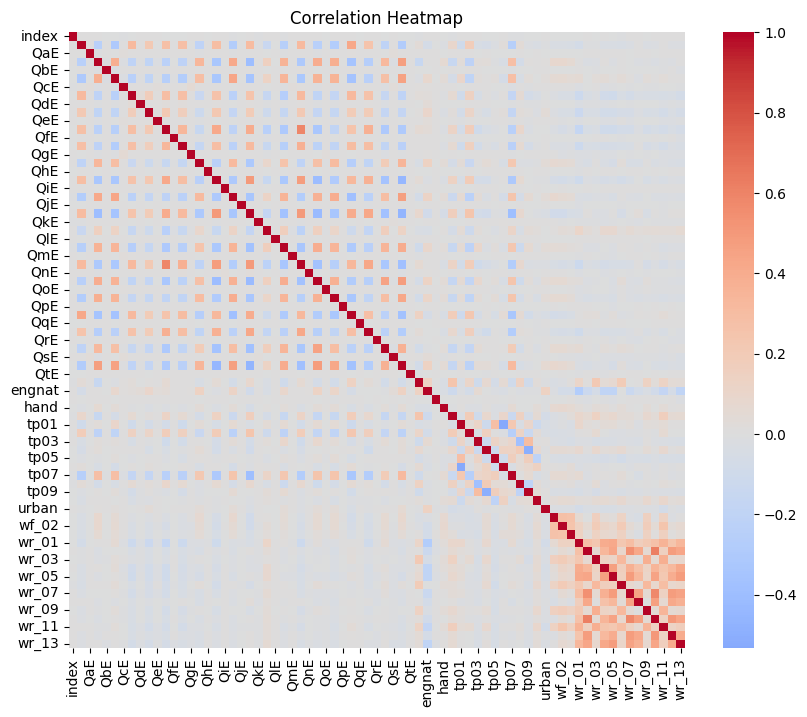

In [17]:
# 상관관계 분석
corr = train_df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    square=True
)

plt.title('Correlation Heatmap')
plt.show()

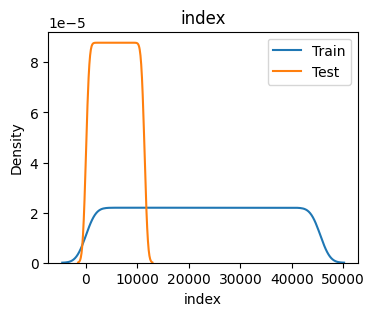

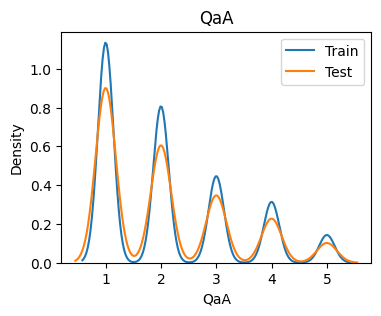

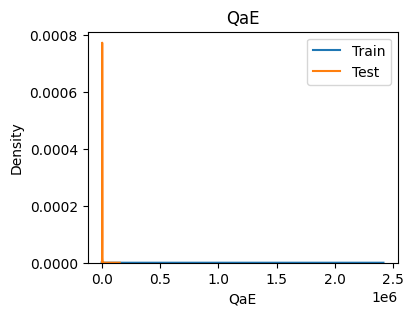

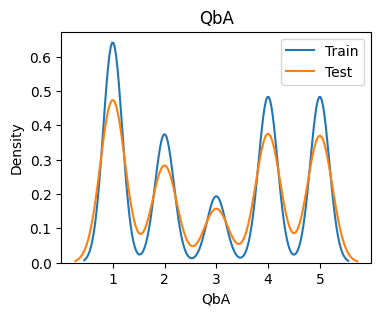

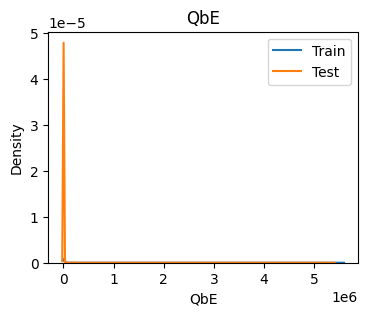

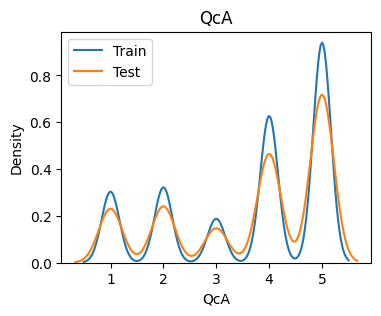

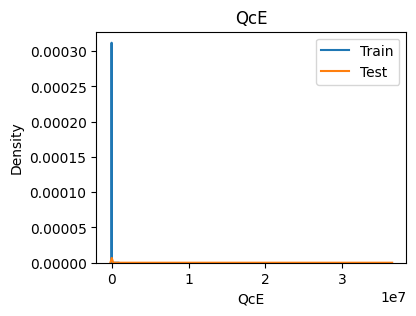

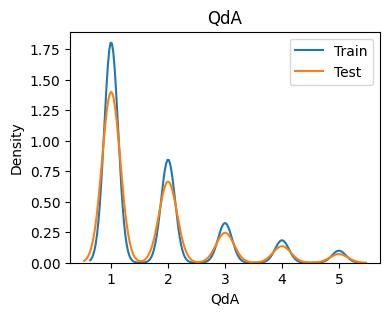

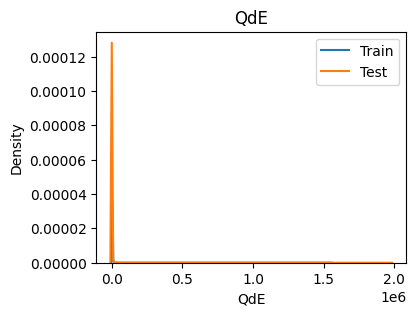

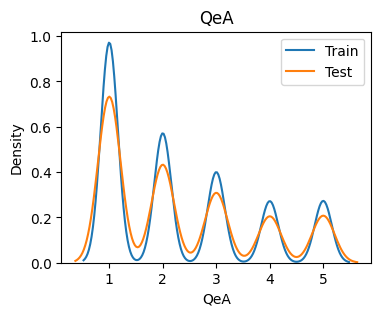

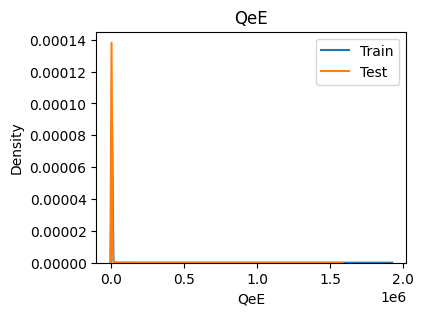

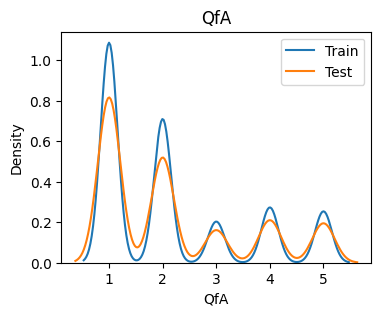

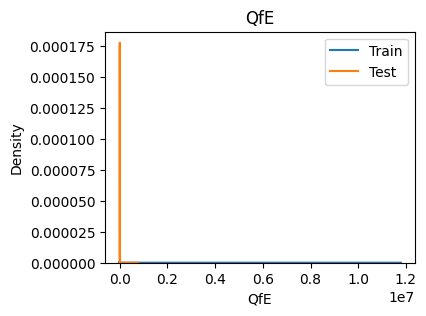

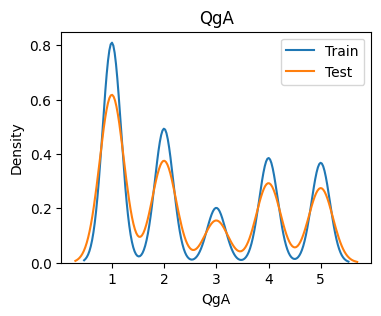

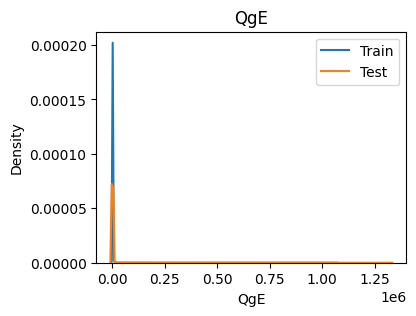

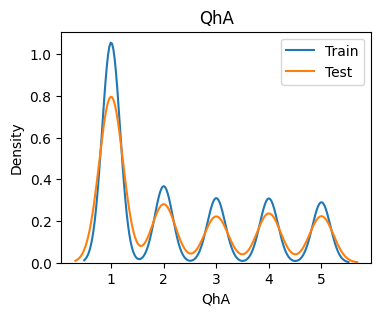

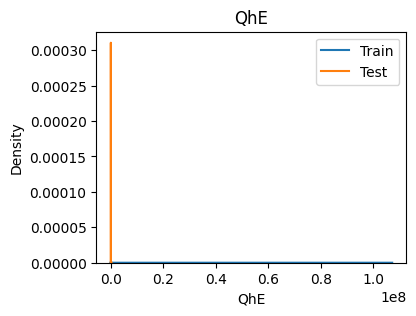

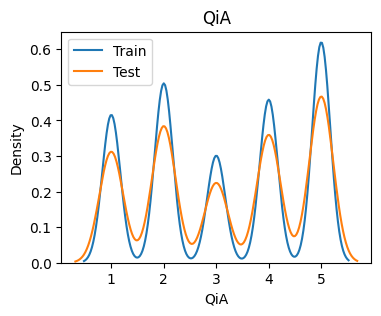

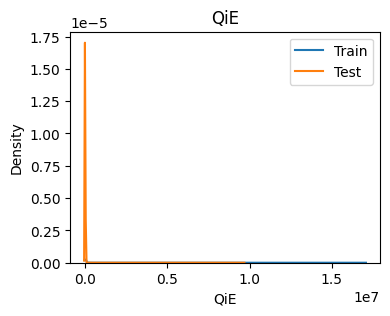

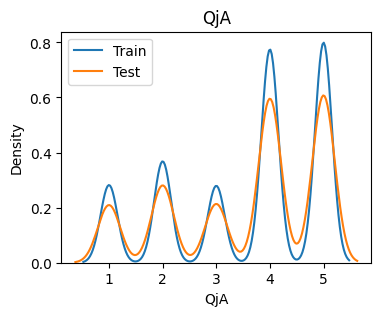

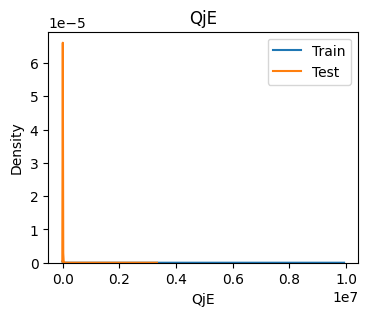

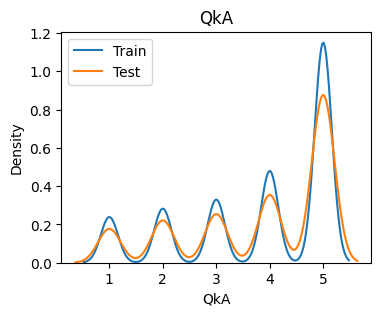

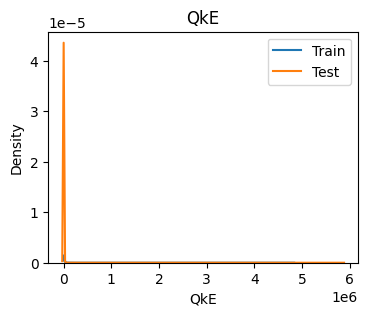

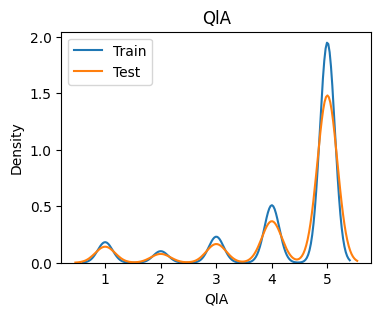

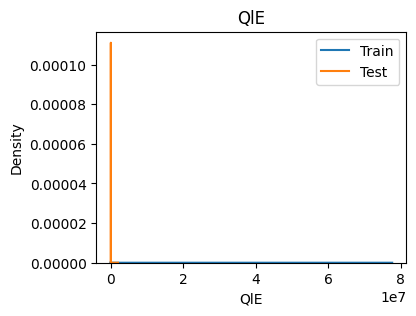

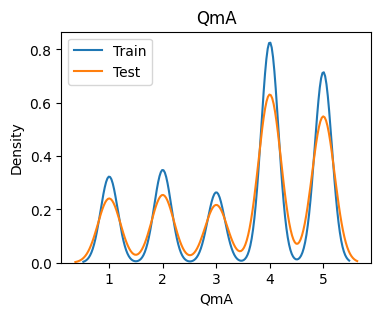

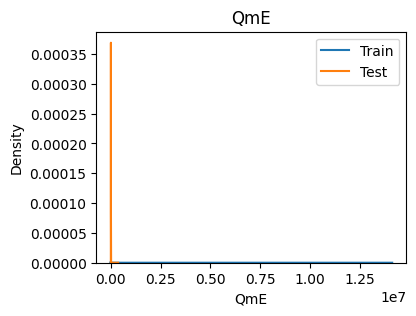

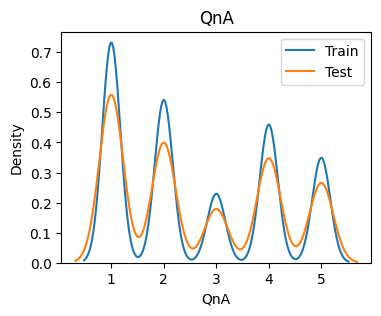

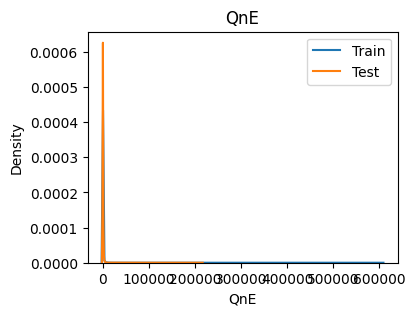

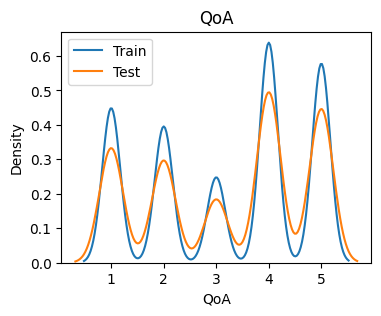

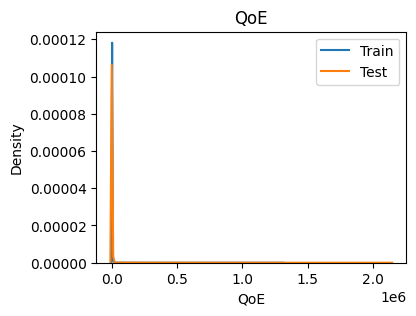

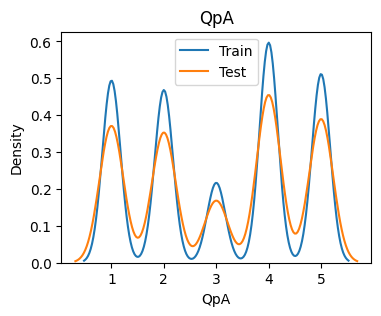

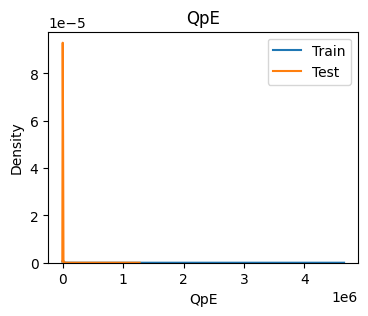

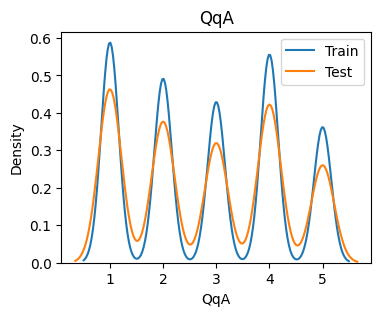

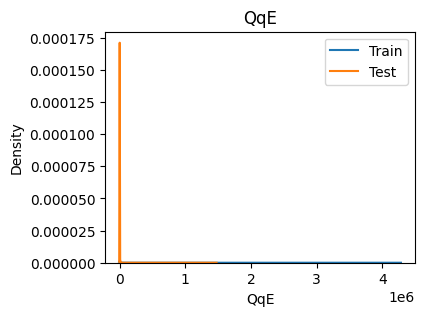

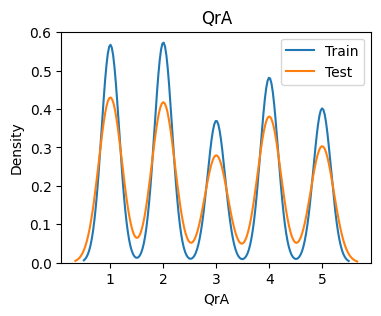

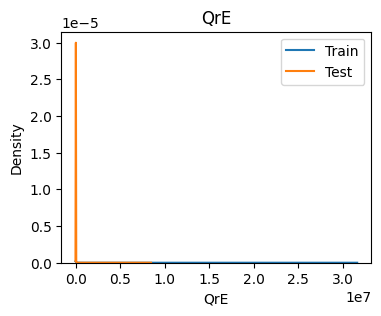

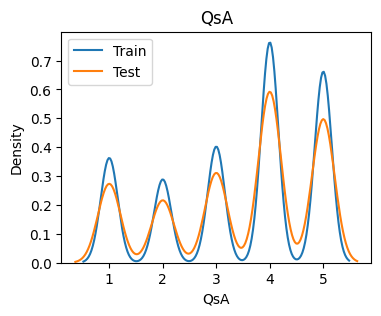

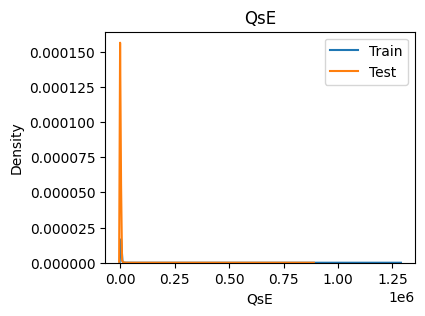

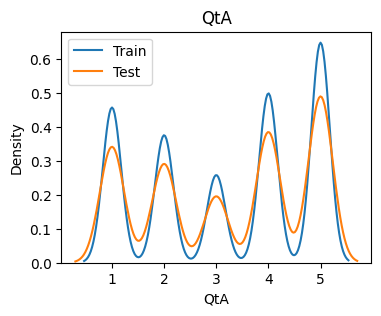

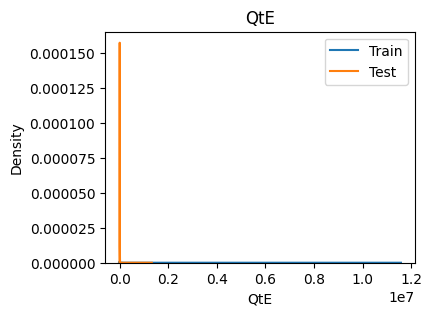

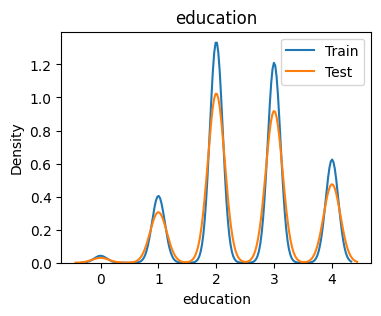

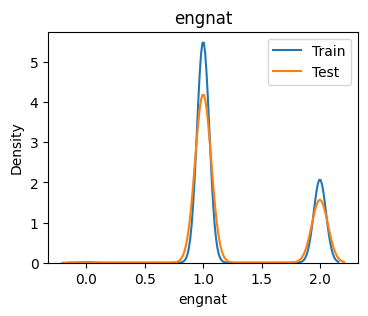

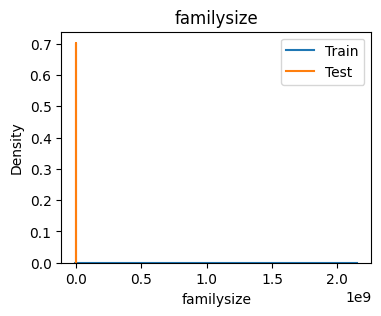

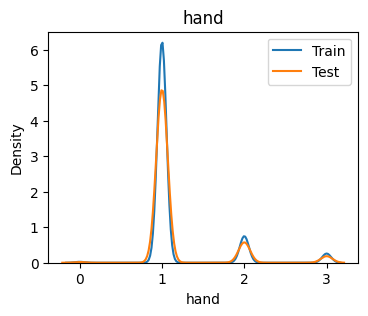

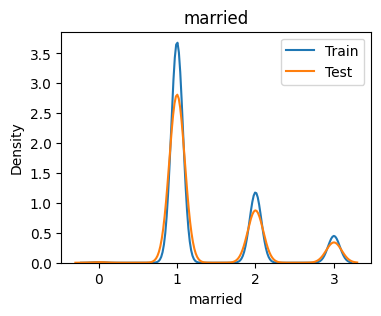

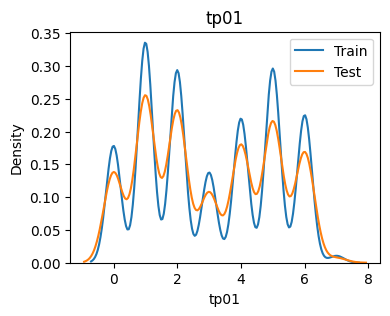

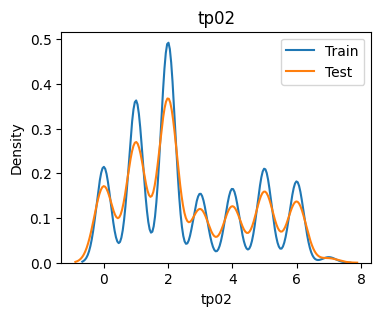

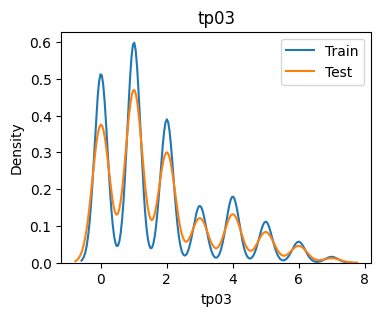

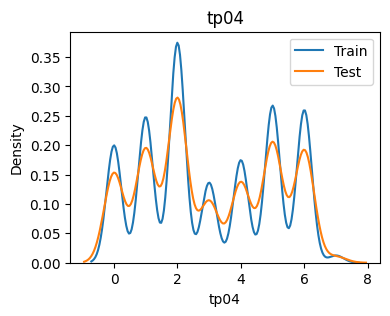

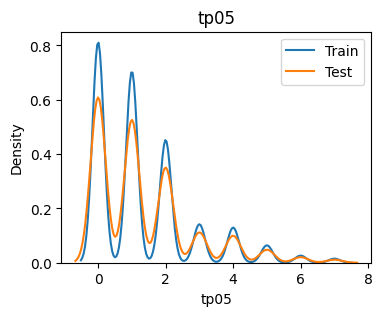

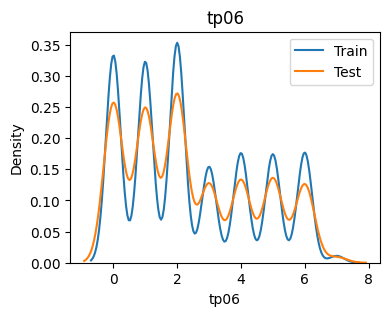

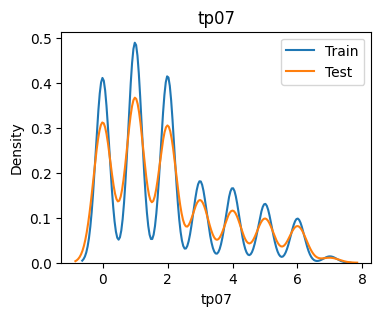

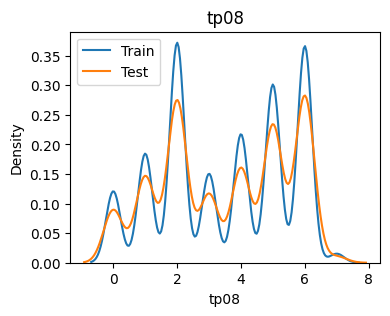

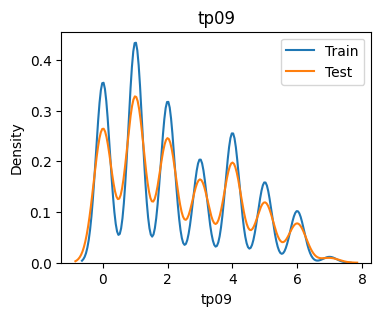

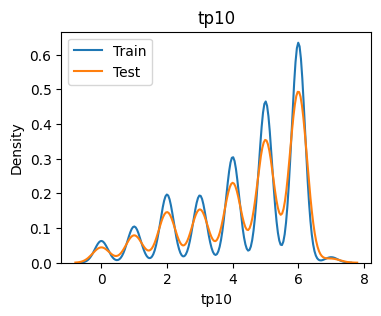

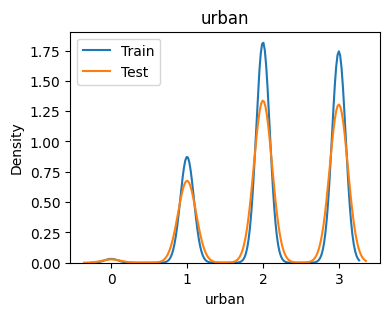

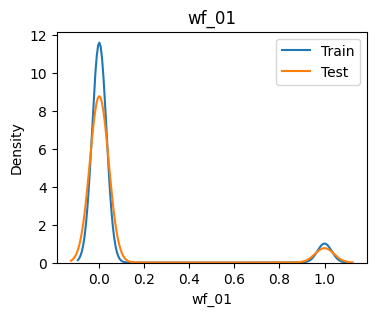

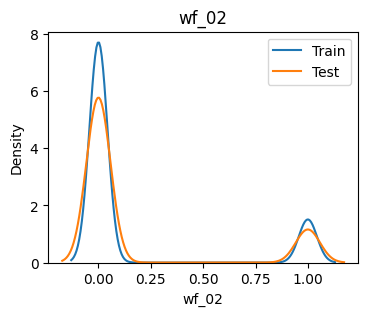

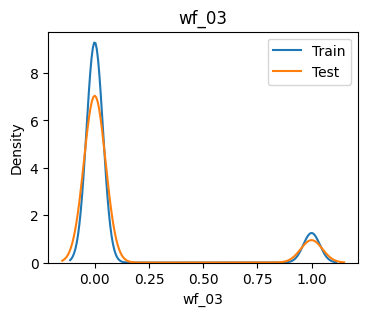

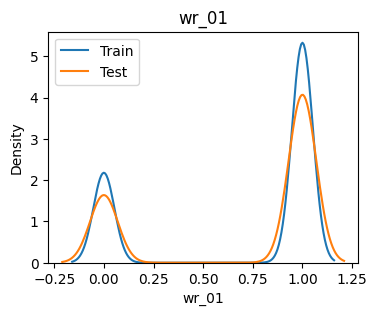

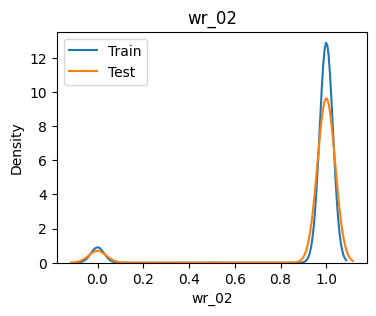

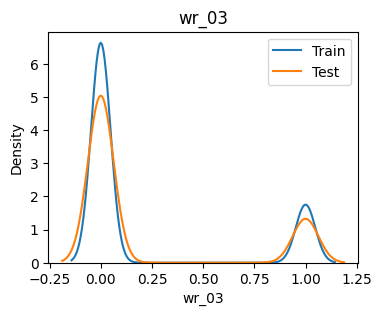

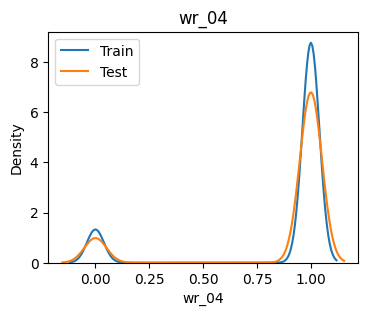

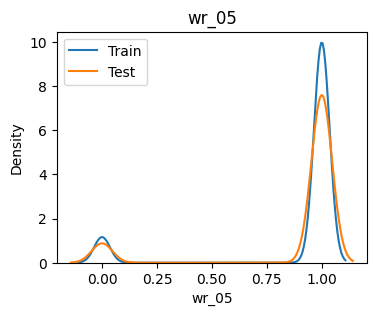

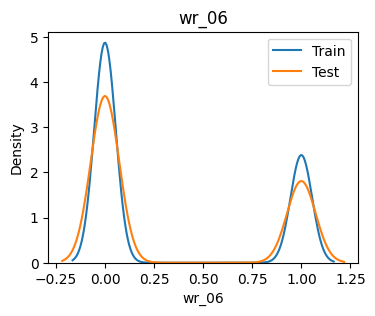

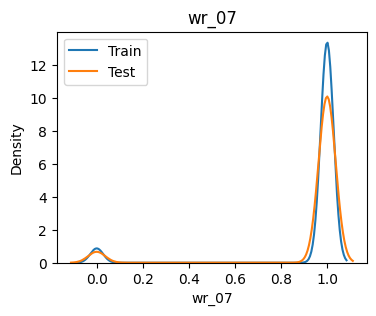

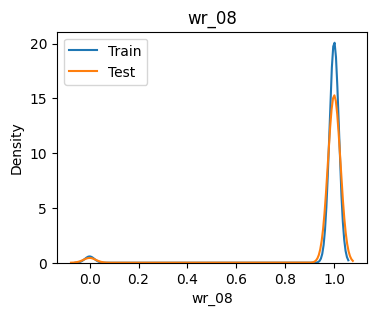

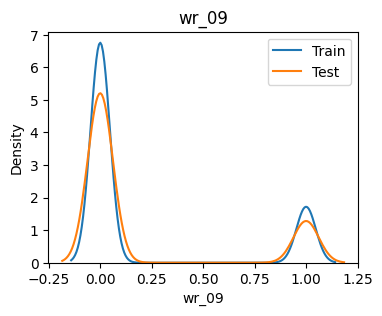

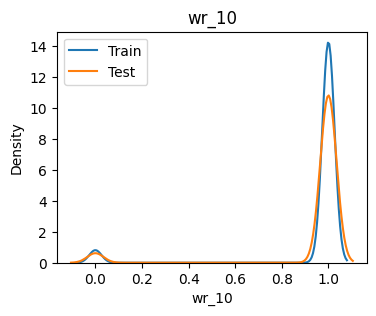

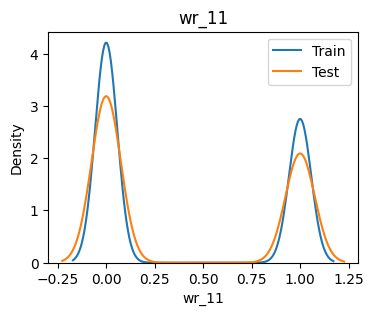

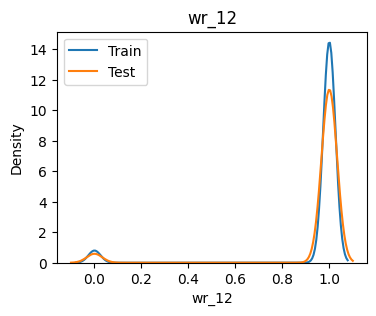

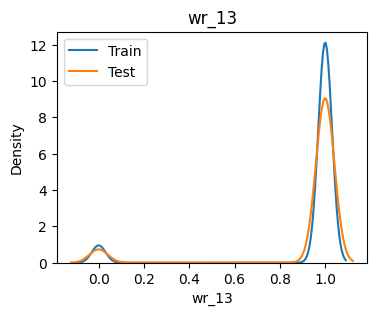

In [23]:
for col in num_cols[:]:
    plt.figure(figsize=(4, 3))
    sns.kdeplot(train_df[col], label='Train')
    sns.kdeplot(test_df[col], label='Test')
    plt.title(col)
    plt.legend()
    plt.show()